# Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets # загрузка стандартных датасетов
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

pd.set_option("display.max_columns", 20) # показывать до 20 колонок
pd.set_option("display.width", 120) # ширина отображения 120 символов

In [2]:
iris = datasets.load_iris(as_frame=True) # загрузить датасет ирисов в виде DataFrame
df_iris = iris.frame.copy() # скопировать датасет в новую переменную
df_iris["species"] = df_iris["target"].map(dict(enumerate(iris.target_names))) # добавить колонку с названиями видов
display(df_iris.head()) # вывести первые 5 строк датасета

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


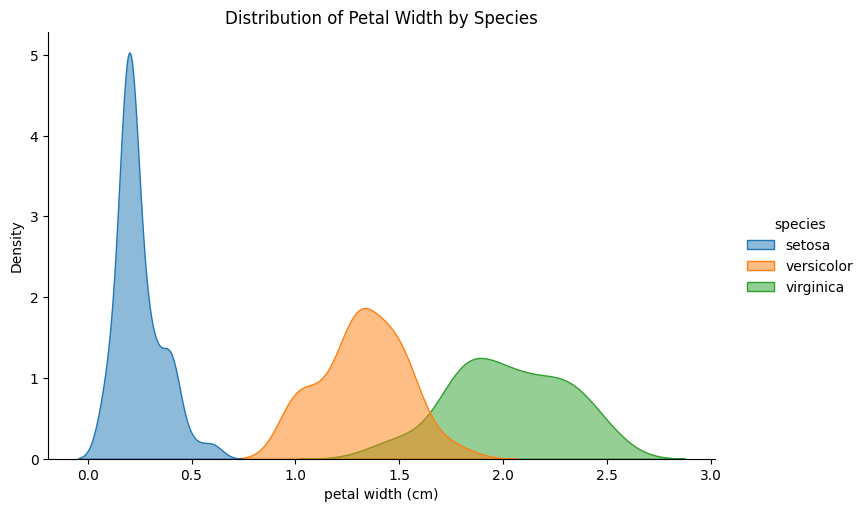

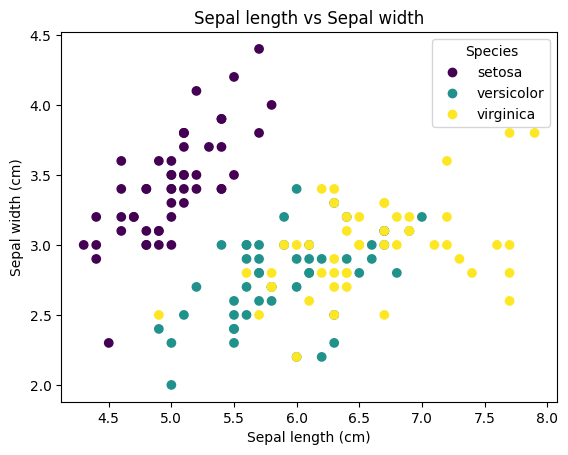

In [19]:
# Потоки данных
#1. Выведем распределения petal width для каждого вида ирисов с помощью seaborn и сведем к нормальному распределению. Запишем в переменную iris_width_dist и выведем на экран
iris_width_dist = sns.displot(
    data=df_iris,
    x="petal width (cm)",
    hue="species",
    kind="kde",
    fill=True,
    common_norm=False,
    alpha=0.5,
    height=5,
    aspect=1.5
)
plt.title("Distribution of Petal Width by Species")
plt.show()
#2. Выведем Scatter plot для petal length и petal width, раскрасив точки по видам ирисов. Запишем в переменную petal_scatter и выведем на экран
petal_scatter = plt.scatter(
    df_iris["sepal length (cm)"],
    df_iris["sepal width (cm)"],
    c=df_iris["target"],
    cmap="viridis"
)
handles, _ = petal_scatter.legend_elements()
plt.legend(handles, iris.target_names, title="Species", loc="best")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Sepal length vs Sepal width")
plt.show()

In [ ]:
# Альтернатива Rank Projection. То есть определение пар признаков, которые лучше всего разделяют классы объектов.
# Начнем с описания функции, которая будет принимать на вход пару признаков и возвращать значение метрики качества логистической регрессии на этих признаках.
from itertools import combinations


def evaluate_feature_pair(X, y, feature_pair, test_size=0.3):
    X_pair = X[list(feature_pair)] # Выбираем только две колонки из X. X - это DataFrame
    X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=test_size, random_state=42) # Разбиваем на обучающую и тестовую выборки
    
    logreg = LogisticRegression(multi_class='ovr', max_iter=200)
    logreg.fit(X_train, y_train)
    accuracy = logreg.score(X_test, y_test)
    return accuracy

for feature1, feature2 in combinations(iris.feature_names, 2):
    feature_pair = (feature1, feature2)
    accuracy = evaluate_feature_pair(df_iris[iris.feature_names], df_iris["target"], feature_pair)
    print(f"Features: {feature_pair}, Accuracy: {accuracy:.4f}")

Features: ('sepal length (cm)', 'sepal width (cm)'), Accuracy: 0.8222
Features: ('sepal length (cm)', 'petal length (cm)'), Accuracy: 0.9556
Features: ('sepal length (cm)', 'petal width (cm)'), Accuracy: 0.8444
Features: ('sepal width (cm)', 'petal length (cm)'), Accuracy: 0.8889
Features: ('sepal width (cm)', 'petal width (cm)'), Accuracy: 0.8889
Features: ('petal length (cm)', 'petal width (cm)'), Accuracy: 1.0000


/home/sergey/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/sergey/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/sergey/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/sergey/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: Future

Silhouette Score: 0.5512


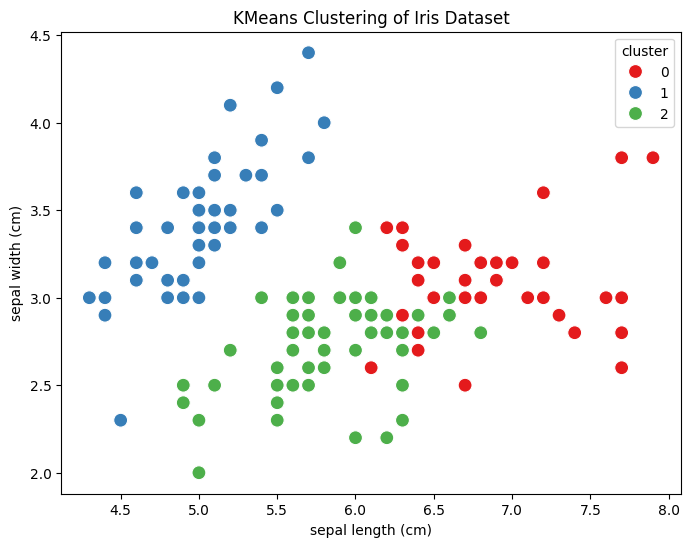

/home/sergey/.venv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


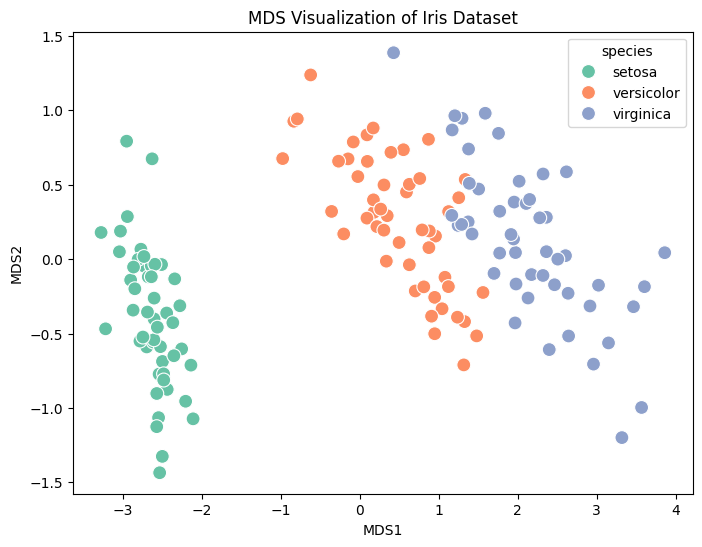

In [46]:
# Кластеризация с использованием KMeans, оценим с помощью silhouette score и визуализируем кластеры
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(df_iris[iris.feature_names])
df_iris['cluster'] = kmeans.labels_
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_iris[iris.feature_names], df_iris['cluster'])
print(f'Silhouette Score: {sil_score:.4f}')
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_iris,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='cluster',
    palette='Set1',
    s=100
)
plt.title('KMeans Clustering of Iris Dataset')
plt.show()

# Теперь посмотрим MDS для визуализации данных в 2D пространстве
from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(df_iris[iris.feature_names])
df_iris['MDS1'] = mds_result[:, 0]
df_iris['MDS2'] = mds_result[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_iris,
    x='MDS1',
    y='MDS2',
    hue='species',
    palette='Set2',
    s=100
)
plt.title('MDS Visualization of Iris Dataset')
plt.show()